In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/home/zj6nw/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df1 = pd.read_csv("/gpfs/gpfs0/project/ds7003-fall22/team1/project/pytorch_time_elapsed_NVIDIA A100-SXM4-80GB.csv")
df2 = pd.read_csv("/gpfs/gpfs0/project/ds7003-fall22/team1/project/pytorch_time_elapsed_Tesla K80.csv")
df3 = pd.read_csv("/gpfs/gpfs0/project/ds7003-fall22/team1/project/pytorch_time_elapsed_Tesla P100-PCIE-12GB.csv")
df4 = pd.read_csv("/gpfs/gpfs0/project/ds7003-fall22/team1/project/pytorch_time_elapsed_Tesla V100-SXM2-32GB.csv")
df5 = pd.read_csv("/gpfs/gpfs0/project/ds7003-fall22/team1/project/crypten_time_elapsed_NVIDIA A100-SXM4-80GB.csv")
df6 = pd.read_csv("/gpfs/gpfs0/project/ds7003-fall22/team1/project/crypten_time_elapsed_Tesla V100-SXM2-32GB.csv")

In [3]:
s = pd.Series([1,2,3,4,5,6,7,8,9,10])
df1['run_number'] = s
df2['run_number'] = s
df3['run_number'] = s
df4['run_number'] = s

In [4]:
df1.rename(columns={'time_elapsed': 'pytorch_A100'}, inplace=True)
df2.rename(columns={'time_elapsed': 'pytorch_K80'}, inplace=True)
df3.rename(columns={'time_elapsed': 'pytorch_P100'}, inplace=True)
df4.rename(columns={'time_elapsed': 'pytorch_V100'}, inplace=True)
df5.rename(columns={'time': 'crypten_A100'}, inplace=True)
df6.rename(columns={'time': 'crypten_V100'}, inplace=True)

In [5]:
df_mid1 = pd.merge(df1, df2, on='run_number', how='left')
df_mid2 = pd.merge(df_mid1, df3, on='run_number', how='left')
df = pd.merge(df_mid2, df4, on='run_number', how='left')
df = df.drop('device_x', axis=1)
df = df.drop('device_y', axis=1)
df = df.drop('run_x', axis=1)
df = df.drop('run_y', axis=1)
df = df.set_index('run_number')
df.head()

<ipython-input-5-572fbac4371c>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'run_x', 'device_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df_mid2, df4, on='run_number', how='left')


,pytorch_A100,pytorch_K80,pytorch_P100,pytorch_V100
run_number,,,,
1,1.168484,2.114963,2.123889,1.013908
2,1.143213,2.132219,2.033871,1.024392
3,1.139673,2.111966,2.008372,0.987177
4,1.141427,2.116346,2.009405,1.006721
5,1.145075,2.122350,2.024469,0.994016


In [6]:
df_test = df.copy()
df_test.head()

,pytorch_A100,pytorch_K80,pytorch_P100,pytorch_V100
run_number,,,,
1,1.168484,2.114963,2.123889,1.013908
2,1.143213,2.132219,2.033871,1.024392
3,1.139673,2.111966,2.008372,0.987177
4,1.141427,2.116346,2.009405,1.006721
5,1.145075,2.122350,2.024469,0.994016


In [7]:
df.head()

,pytorch_A100,pytorch_K80,pytorch_P100,pytorch_V100
run_number,,,,
1,1.168484,2.114963,2.123889,1.013908
2,1.143213,2.132219,2.033871,1.024392
3,1.139673,2.111966,2.008372,0.987177
4,1.141427,2.116346,2.009405,1.006721
5,1.145075,2.122350,2.024469,0.994016


In [8]:
for column in df_test:
    df_test[column] = df_test[column].cumsum()

df_test.head()

,pytorch_A100,pytorch_K80,pytorch_P100,pytorch_V100
run_number,,,,
1,1.168484,2.114963,2.123889,1.013908
2,2.311696,4.247182,4.157760,2.038299
3,3.451369,6.359148,6.166132,3.025477
4,4.592796,8.475494,8.175537,4.032197
5,5.737871,10.597844,10.200006,5.026213


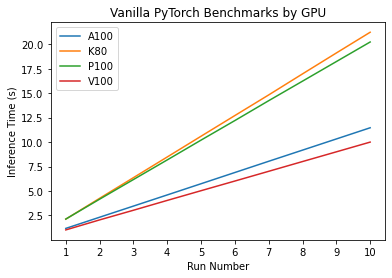

In [9]:
plt.plot(df_test)
plt.legend(("A100", "K80", "P100", "V100"))
plt.title("Vanilla PyTorch Benchmarks by GPU")
plt.xlabel("Run Number")
plt.ylabel("Inference Time (s)")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

In [10]:
df.loc['mean'] = df.mean()

In [11]:
df

,pytorch_A100,pytorch_K80,pytorch_P100,pytorch_V100
run_number,,,,
1,1.168484,2.114963,2.123889,1.013908
2,1.143213,2.132219,2.033871,1.024392
3,1.139673,2.111966,2.008372,0.987177
4,1.141427,2.116346,2.009405,1.006721
5,1.145075,2.122350,2.024469,0.994016
6,1.148993,2.115161,2.000751,0.987917
7,1.147879,2.108690,2.032024,0.995026
8,1.140018,2.152100,1.996825,0.997701
9,1.142283,2.137542,2.002723,0.993648


In [12]:
df_means = df.loc[['mean'],:]
df_means

,pytorch_A100,pytorch_K80,pytorch_P100,pytorch_V100
run_number,,,,
mean,1.146163,2.123262,2.023511,0.999561


In [13]:
df_means['crypten_A100'] = 1426.016529

In [14]:
df_means['crypten_V100'] = 770.035461

In [15]:
df_means

,pytorch_A100,pytorch_K80,pytorch_P100,pytorch_V100,crypten_A100,crypten_V100
run_number,,,,,,
mean,1.146163,2.123262,2.023511,0.999561,1426.016529,770.035461


In [16]:
df_transpose = df_means.transpose()
df_transpose

run_number,mean
pytorch_A100,1.146163
pytorch_K80,2.123262
pytorch_P100,2.023511
pytorch_V100,0.999561
crypten_A100,1426.016529
crypten_V100,770.035461


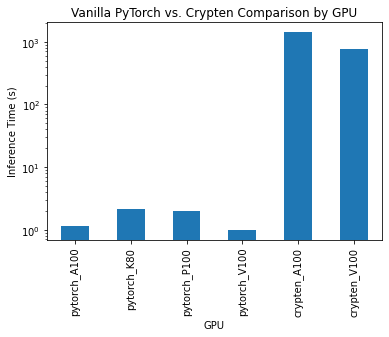

In [17]:
df_transpose.plot(kind="bar", title="test")
plt.title("Vanilla PyTorch vs. Crypten Comparison by GPU")
plt.xlabel("GPU")
_ = plt.ylabel("Inference Time (s)")
plt.yscale("log")
_ = plt.legend('',frameon=False)

In [18]:
data = [[1.146163,1426.016529],[2.123262,0],[2.023511,0],
       [0.999561,770.035461]]
df_final = pd.DataFrame(data, columns=['PyTorch', 'Crypten'])

In [19]:
s = ["A100", "K80", "P100", "V100"]
df_final['GPU'] = s
df_final = df_final.set_index('GPU')
df_final

,PyTorch,Crypten
GPU,,
A100,1.146163,1426.016529
K80,2.123262,0.000000
P100,2.023511,0.000000
V100,0.999561,770.035461


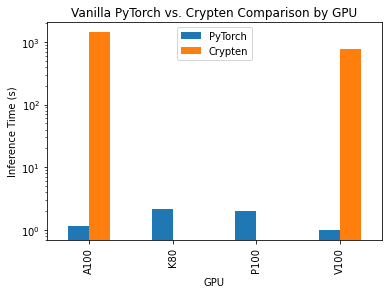

In [20]:
df_final.plot(kind="bar", title="test")
plt.title("Vanilla PyTorch vs. Crypten Comparison by GPU")
plt.xlabel("GPU")
_ = plt.ylabel("Inference Time (s)")
plt.yscale("log")